<a href="https://colab.research.google.com/github/prajaktasonawane98/My-Projects/blob/main/Task6_DecisionTrees_clsf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Name: Prajakta Sonawane**

### **Task 2 - Prediction using Decision Tree Algorithm**

### **Data Science and Business Analytics Intern at The Sparks Foundation**

### **Problem Statement:** Create the Decision Tree classifier, predict the right class accordingly and visualize it graphically.

### **Importing Liabraries**

In [1]:
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### **Loading Dataset**

In [2]:
iris = datasets.load_iris()

In [3]:
# converts all data into dataframe

iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
print(iris_data.head(5))          # input/Predictors

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [4]:
# target data

iris_data['target'] = iris.target
iris_data['target'].head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

### **Data Preprocessing**

In [5]:
iris_data.shape

(150, 5)

This dataset has 150 rows and 5 columns

In [6]:
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [7]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### **Exploratory Data Analysis**

In [8]:
iris_outcome = pd.crosstab(index=iris_data["target"],  columns="count")      
iris_outcome

col_0,count
target,
0,50
1,50
2,50


### **Pair Plot visualization**

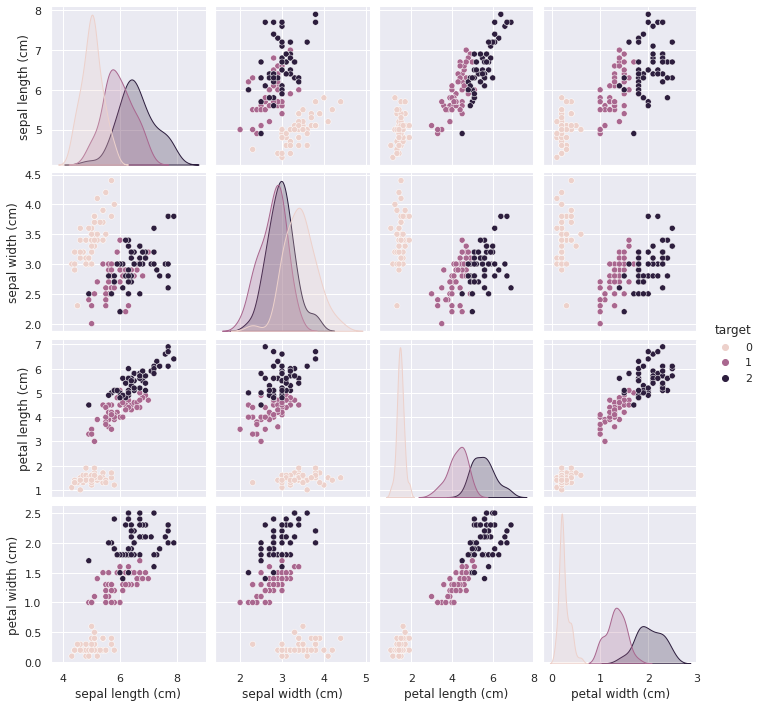

In [9]:
sns.set()
sns.pairplot(iris_data, hue="target")

### **Correlation Matrix**

In [10]:
tree = iris_data.corr()
tree

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


### **Correlation matrix visualization**

Text(0.5, 1.0, 'Correlation between variables')

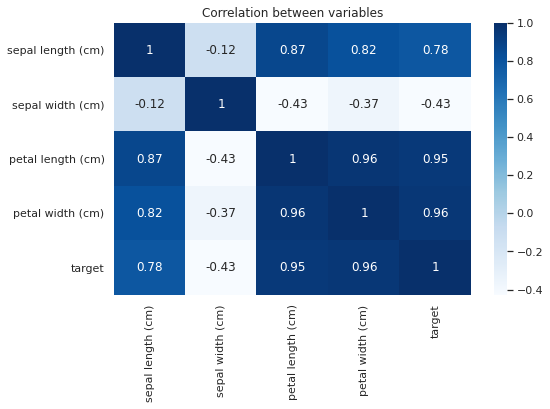

In [11]:
plt.figure(figsize=(8,5))
sns.heatmap(tree, cmap='Blues',annot=True)
plt.title('Correlation between variables')

### **Modelling**

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

### **Splitting Data into Training and Test Sets**

In [13]:
# The code puts 75% of the data into a training set and 25% of the data into a test set.

X_train, X_test, Y_train, Y_test = train_test_split(iris_data[iris.feature_names], iris_data['target'], random_state=0)

In [14]:
# initializes the model

classifier = DecisionTreeClassifier()
classifier

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### **Train the model on the data**

In [15]:
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### **Predict labels of test data**

In [16]:
# Predict for 1 observation
# A prediction is just the majority class of the instances in a leaf node.
classifier.predict(X_test.iloc[0].values.reshape(1, -1))

# Predict for multiple observations
classifier.predict(X_test[0:10])

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

### **Measuring Model Performance**

In [17]:
# Score returns the accuracy of the model

score = classifier.score(X_test, Y_test)
print("Accuracy:" , score)

Accuracy: 0.9736842105263158


### **Identifying the feature importance**

In [18]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(classifier.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
2,petal length (cm),0.906
3,petal width (cm),0.054
1,sepal width (cm),0.040
0,sepal length (cm),0.000


The **petal length** has the highest feature importance weight

### **Visualization of Desicion Tree**

In [19]:
# Install required libraries for disicion tree visualization

!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


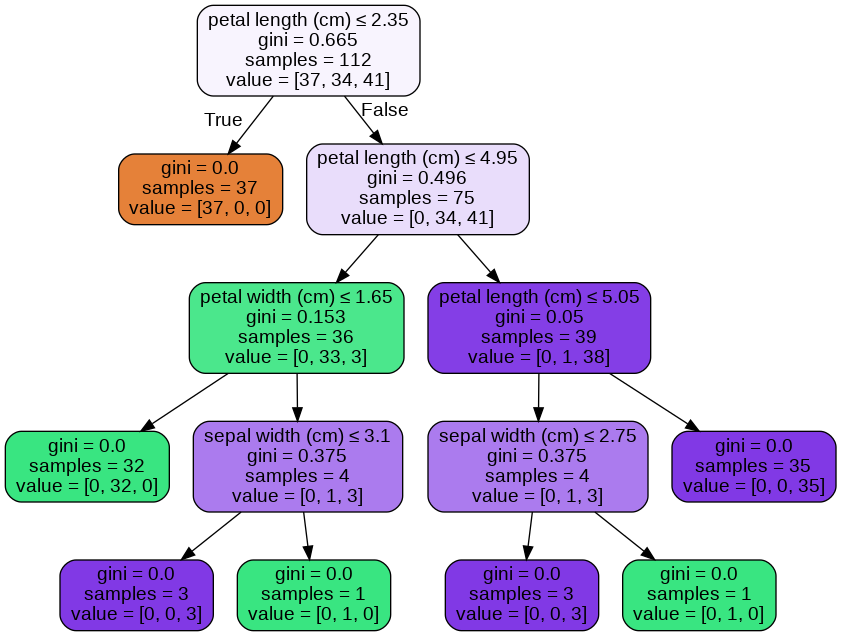

In [20]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# **Thank You!**